# Klasifikasi Penyakit **Diabetes**

---



Tahapan:

1. Import Library
2. Dataset
3. Exploratory Data Analysis (EDA)
4. Preprocessing Data 
5. Feature Selection
6. Data Split 
7. Building Model 
8. Model Testing 
9. Evaluation 
10. Conclusion 

# Import Library

---



In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import itertools 
import seaborn as sns
from pandas.core.dtypes.cast import invalidate_string_dtypes
%matplotlib inline

# Dataset

---





*   Input Dataset
*   Load and Read Dataset



**Connect Drive for Dataset**

In [2]:
# connect gdrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load & Read dataset**

In [3]:
# Load and Read dataset
data = pd.read_csv("drive/MyDrive/S-K/diabetes_768.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploratory Data Analysis

---





*   Sample Data
*   Statistic Descriptive Data
*   Visualization Data



**Sample Data**

In [4]:
# top data

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# bottom data

data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# size data
# (rows, columns)

data.shape

(768, 9)

**Statistic Descriptive Data**

In [7]:
# Descriptive analysis
# helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Visualization Data**

original data before data preprocessing

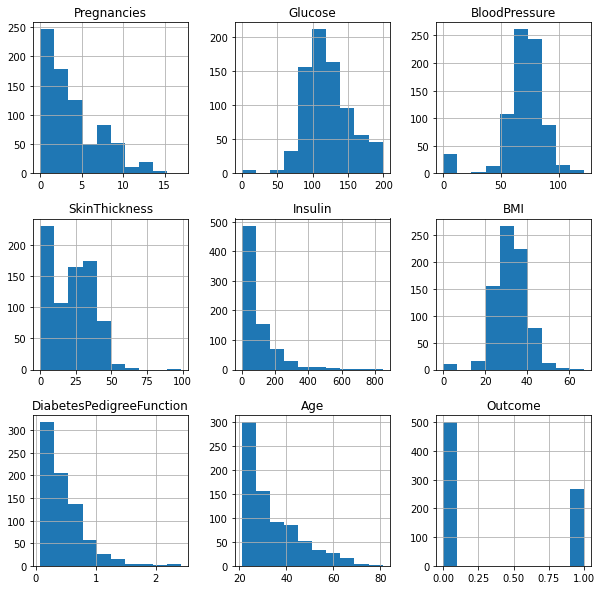

In [9]:
# plotting variation graphs for each variable
 
vis = data.hist(figsize = (10,10))
plt.savefig('Histo_Dataset_9.png')

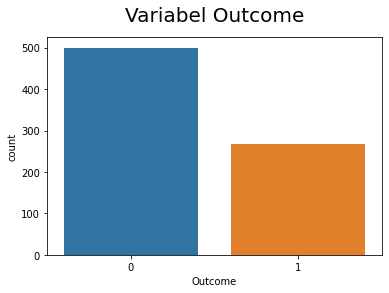

In [10]:
# 0 : NonDiabetes
# 1 : Diabetes
# plotting graph for output classes counts

vis = sns.countplot(x=data['Outcome'])
data['Outcome'].value_counts()
plt.title('Variabel Outcome', pad=5, y=1.05, size=20 )
plt.savefig('Graph_Outcome_Count.png')

# Preprocessing Data

---





*   Check Data
*   Data Cleaning
*   Data Integration
*   Data Selection
*   Data Transformation




**Check Data**

In [11]:
# print type data
print('Type Data')
print(data.dtypes)

Type Data
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Type of Dataset is Numeric

**Data cleaning**

In [13]:
# Check missing values
# NaN
print('Check missing values NaN')
data.isnull().sum()

Check missing values NaN


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null value present in data

In [14]:
# Removing the data duplicates

data.duplicated().sum()
print('Result Data Duplicates')
display(data.drop_duplicates(inplace=True))

# Information dataset
print()
print('Information Dataset')
data.info()

Result Data Duplicates


None


Information Dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [15]:
# Read data
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
# Check column names in dataset

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
# Checking data if data has 0 values present 

print('Check Data that has a value of 0 in each feature')
print('-------------------------------')


print("Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("Age: {0}".format(len(data.loc[data['Age'] == 0])))

Check Data that has a value of 0 in each feature
-------------------------------
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


In [18]:
# fill in the value 0 in each feature with the mean or median
# except feature pregnancies

mean = data["Glucose"].mean()
data["Glucose"] = data["Glucose"].replace(0, mean)

mean = data["SkinThickness"].mean()
data["SkinThickness"] = data["SkinThickness"].replace(0, mean)

mean= data["Insulin"].mean()
data["Insulin"] = data["Insulin"].replace(0, mean)

mean = data["BloodPressure"].mean()
data["BloodPressure"] = data["BloodPressure"].replace(0, mean)

median = data["BMI"].median()
data["BMI"] = data["BMI"].replace(0, median)

In [19]:
# After filling in the value 0 in the data with the mean or median
print('Check data that has a value of 0')
print('after filling in the mean or median')
print('-------------------------------')


print("Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("Age: {0}".format(len(data.loc[data['Age'] == 0])))

Check data that has a value of 0
after filling in the mean or median
-------------------------------
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


In [20]:
# Read dataset after data cleaning
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


**Outlier**

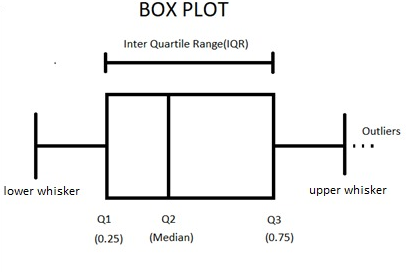

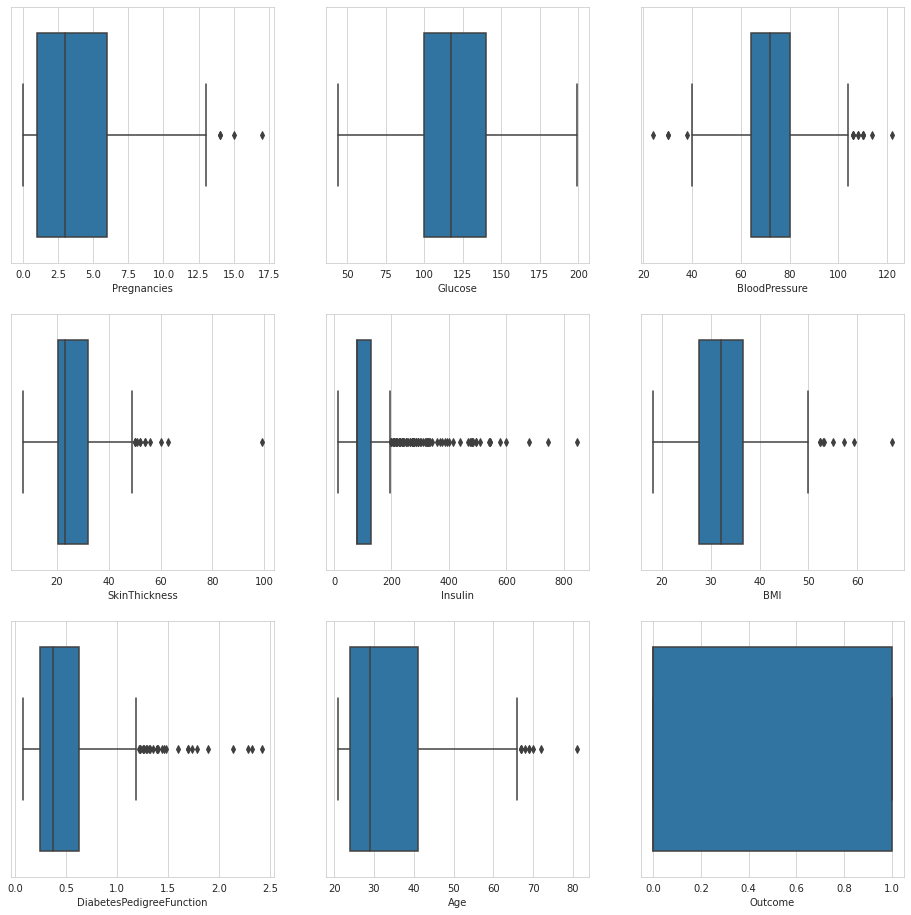

In [21]:
# Check Outliers in Dataset Diabetes
plt.figure(figsize=(16,16))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x=data['Pregnancies'],data=data)

plt.subplot(3,3,2)
sns.boxplot(x=data['Glucose'],data=data)

plt.subplot(3,3,3)
sns.boxplot(x=data['BloodPressure'],data=data)

plt.subplot(3,3,4)
sns.boxplot(x=data['SkinThickness'],data=data)

plt.subplot(3,3,5)
sns.boxplot(x=data['Insulin'],data=data)

plt.subplot(3,3,6)
sns.boxplot(x=data['BMI'],data=data)

plt.subplot(3,3,7)
sns.boxplot(x=data['DiabetesPedigreeFunction'],data=data)

plt.subplot(3,3,8)
sns.boxplot(x=data['Age'],data=data)

plt.subplot(3,3,9)
sns.boxplot(x=data['Outcome'],data=data)

In [22]:
# Handling with IQR for Outliers

Q1 = (data[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]).quantile(0.25)
Q3 = (data[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Maksikum :', maximum)
minimum = Q1 - (1.5*IQR)
print('Minimum', minimum)

more_than = (data>maximum)
lower_than = (data<minimum)

data= data.mask(more_than, maximum, axis=1)
data = data.mask(lower_than, minimum, axis=1)

print('\n Persebaran Data After Handling Outliers')
print(data[['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].describe())

Maksikum : Pregnancies                  13.500000
BloodPressure               104.000000
SkinThickness                49.195312
Insulin                     198.425781
BMI                          50.250000
DiabetesPedigreeFunction      1.200000
Age                          66.500000
dtype: float64
Minimum Pregnancies                 -6.500000
BloodPressure               40.000000
SkinThickness                3.341146
Insulin                      8.623698
BMI                         13.850000
DiabetesPedigreeFunction    -0.330000
Age                         -1.500000
dtype: float64

 Persebaran Data After Handling Outliers
       Pregnancies  BloodPressure  SkinThickness     Insulin         BMI  \
count   768.000000     768.000000     768.000000  768.000000  768.000000   
mean      3.837240      72.226161      26.475416  103.895703   32.389063   
std       3.344157      11.716722       9.112201   46.779152    6.667627   
min       0.000000      40.000000       7.000000   14.000000   18.

<ipython-input-22-98a7ca0c9ae3>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (data>maximum)
<ipython-input-22-98a7ca0c9ae3>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (data<minimum)


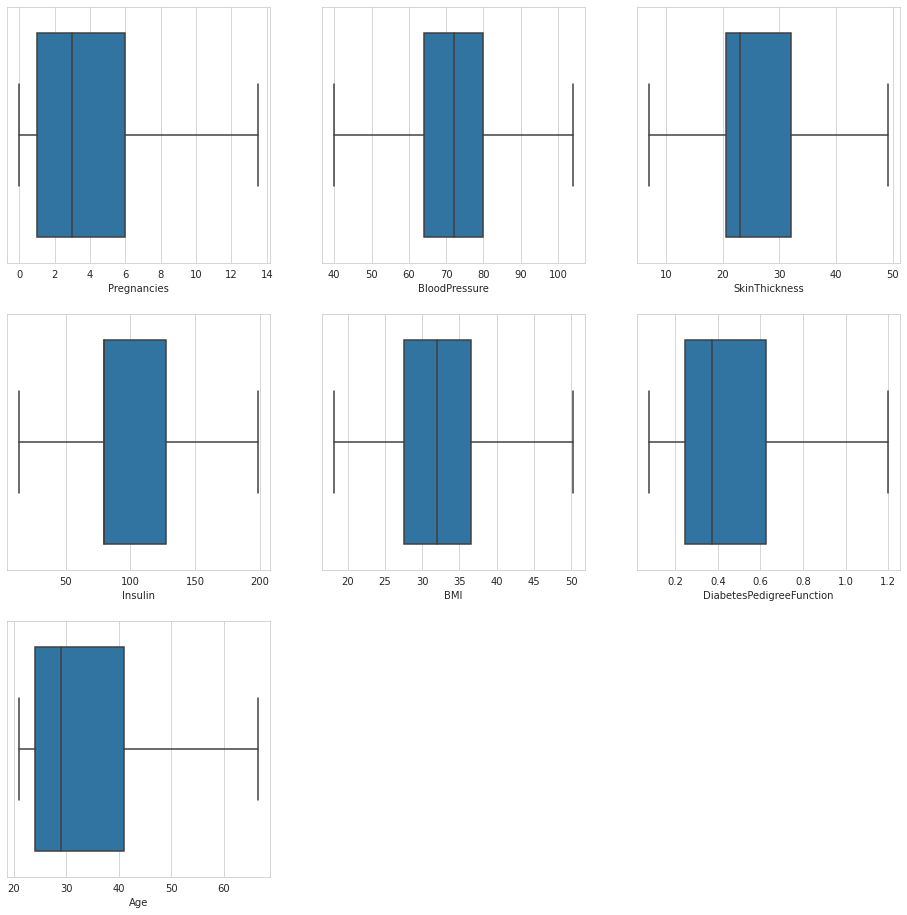

In [23]:
# Check Outliers in Dataset Diabetes After using IQR
plt.figure(figsize=(16,16))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x=data['Pregnancies'],data=data)

plt.subplot(3,3,2)
sns.boxplot(x=data['BloodPressure'],data=data)

plt.subplot(3,3,3)
sns.boxplot(x=data['SkinThickness'],data=data)

plt.subplot(3,3,4)
sns.boxplot(x=data['Insulin'],data=data)

plt.subplot(3,3,5)
sns.boxplot(x=data['BMI'],data=data)

plt.subplot(3,3,6)
sns.boxplot(x=data['DiabetesPedigreeFunction'],data=data)

plt.subplot(3,3,7)
sns.boxplot(x=data['Age'],data=data)

In [24]:
# After Data Cleaning
# check the data on the target outcome

data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
# Save new file after data cleaning

data.to_csv("Diabetes_DataCleaning.csv", index=False)

**Data integration**

Tidak ada proses data integration, karena data yang digunakan hanya menggunakan 1 dataset saja. 

**Data selection**

Data hasil seleksi yang digunakan untuk proses data mining, disimpan dalam suatu berkas, terpisah dari basis data operasional. Pada penelitian ini, tetap menggunakan semua data yang telah dilakukan proses sebelumnya. 

**Data transformation**


Tahap ini menggunakan standardscaler

**Feature Selection**

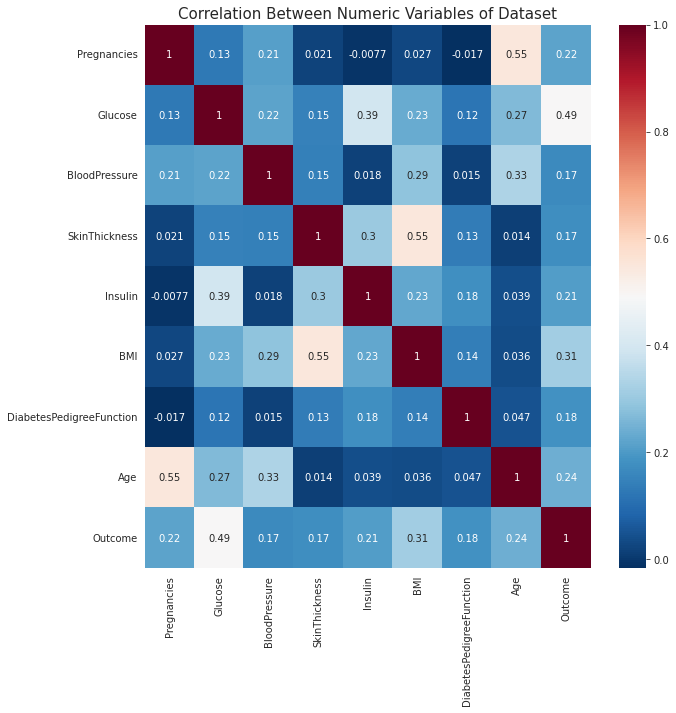

In [26]:
# Feature Selection using Pearson Correlation
corr_pearson = data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_pearson, cmap="RdBu_r", annot=True)

plt.title('Correlation Between Numeric Variables of Dataset',  y=1.05, size=15)
plt.show()

In [27]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126606,0.211257,0.020722,-0.007679,0.027145,-0.017398,0.549695,0.220392
Glucose,0.126606,1.000000,0.220946,0.149026,0.394778,0.234032,0.118236,0.268602,0.492908
BloodPressure,0.211257,0.220946,1.000000,0.145294,0.017952,0.286509,0.015067,0.334903,0.166131
SkinThickness,0.020722,0.149026,0.145294,1.000000,0.303747,0.548189,0.134284,0.013831,0.173868
Insulin,-0.007679,0.394778,0.017952,0.303747,1.000000,0.225806,0.180001,0.038798,0.208749
BMI,0.027145,0.234032,0.286509,0.548189,0.225806,1.000000,0.138541,0.035861,0.313030
DiabetesPedigreeFunction,-0.017398,0.118236,0.015067,0.134284,0.180001,0.138541,1.000000,0.047289,0.184969
Age,0.549695,0.268602,0.334903,0.013831,0.038798,0.035861,0.047289,1.000000,0.242702
Outcome,0.220392,0.492908,0.166131,0.173868,0.208749,0.313030,0.184969,0.242702,1.000000


Karena pada proses ini akan menggunakan semua feature yang ada pada dataset. Maka tidak ada penghapusan feature dari dataset.

In [28]:
# Change name file

dataset_new_all = data

In [29]:
# Dataset Diabetes with All features

dataset_new_all.to_csv("diabetes_all_features.csv", index=False)

In [30]:
dataset_new_all

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47.0,1


In [31]:
from sklearn.preprocessing import StandardScaler
# Standarisasi 

scaler = StandardScaler()
dataset_new_all.iloc[:, :-1] = scaler.fit_transform(dataset_new_all.iloc[:, :-1])
dataset_new_all

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.865276,-0.019315,0.936123,-0.515442,0.181733,0.588927,1.445691,1
1,-0.848970,-1.205989,-0.531737,0.277236,-0.515442,-0.868800,-0.378101,-0.189304,0
2,1.245598,2.015979,-0.702545,-0.652184,-0.515442,-1.364051,0.746595,-0.103252,1
3,-0.848970,-1.074480,-0.531737,-0.381651,-0.211679,-0.643686,-1.022787,-1.049828,0
4,-1.148194,0.503626,-2.752234,0.936123,1.371253,1.607456,2.596563,-0.017199,1
...,...,...,...,...,...,...,...,...,...
763,1.844045,-0.679954,0.322300,2.363711,1.627945,0.076680,-1.008772,2.564372,0
764,-0.549746,0.010468,-0.190122,0.057607,-0.515442,0.661976,-0.416642,-0.533513,0
765,0.347926,-0.022409,-0.019315,-0.381651,0.173359,-0.928831,-0.749497,-0.275356,0
766,-0.848970,0.141977,-1.044160,-0.652184,-0.515442,-0.343534,-0.385109,1.187534,1


In [32]:
# Dataset Diabetes with All features

dataset_new_all.to_csv("diabetes_after_preprocessing_all.csv", index=False)

In [33]:
# Choosing x and y

#target = 'Outcome'
#Feature_variables = dataset_new.drop(target, axis=1) #independent (x)
#Target_variable = dataset_new[target].astype(int) #dependent (y)

Feature_variables = dataset_new_all.iloc[:, :-1]
Target_variable = dataset_new_all.iloc[:, -1]

[:, -1]: pilih semua baris, kolom terakhir.

[:, :-1]: pilih semua baris dalam dataset, serta semua kolom kecuali kolom terakhir (ingat negative indexing pada Python).

In [34]:
Feature_variables # data variable x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.865276,-0.019315,0.936123,-0.515442,0.181733,0.588927,1.445691
1,-0.848970,-1.205989,-0.531737,0.277236,-0.515442,-0.868800,-0.378101,-0.189304
2,1.245598,2.015979,-0.702545,-0.652184,-0.515442,-1.364051,0.746595,-0.103252
3,-0.848970,-1.074480,-0.531737,-0.381651,-0.211679,-0.643686,-1.022787,-1.049828
4,-1.148194,0.503626,-2.752234,0.936123,1.371253,1.607456,2.596563,-0.017199
...,...,...,...,...,...,...,...,...
763,1.844045,-0.679954,0.322300,2.363711,1.627945,0.076680,-1.008772,2.564372
764,-0.549746,0.010468,-0.190122,0.057607,-0.515442,0.661976,-0.416642,-0.533513
765,0.347926,-0.022409,-0.019315,-0.381651,0.173359,-0.928831,-0.749497,-0.275356
766,-0.848970,0.141977,-1.044160,-0.652184,-0.515442,-0.343534,-0.385109,1.187534


In [35]:
Target_variable # data variable y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [36]:
# Check independent and dependent variables
print(Feature_variables.shape)
print(Target_variable.shape)

(768, 8)
(768,)


# Data Split

---



Data training : building model 

Data testing : evaluation model 

Explain Parameter


*   test_size is the number that defines the size of the testing set. 
*   train_size is the number that defines the size of the training set. 
*   random_state is the object that controls randomization during splitting. 

*   shuffle is the boolean



In [37]:
# import library  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Feature_variables, Target_variable, test_size = 0.2, random_state=1)



*   X_train = the training part of the first sequence (Feature_variables_x)
*   X_test = the test part of the first sequence (Feature_variables_x)
*   y_train = the training part of the second sequence (Target_variable)
*   y_test = the test part of the second sequence (Target_variable)




In [38]:
# Size of train set and test set

print('Result from Data Split of Dataset Diabetes')
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Result from Data Split of Dataset Diabetes
Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


# Building Model and Testing Model
---
with All Features



In [39]:
pip install neupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 KB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.2/197.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tableprint: filename=tableprint-0.7.1-py3-none-any.whl size=6180 sha256=

In [40]:
# Library for Modelling and Evaluation 

from sklearn.neighbors import KNeighborsClassifier #Library kNN
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.datasets import make_classification  
from sklearn.model_selection import KFold #for k-Fold Cross Validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics._plot.confusion_matrix import confusion_matrix #for confusion matrix
from sklearn import metrics 
import numpy 
from neupy import algorithms  # Library Neural Network

# Probabilistic Neural Network

Time: 0:00:00 |N/A%|                                           | ETA:  --:--:--

Value of Std =  1 The Accuracy of the Probabilistic Neural Network Classifier is 77.3
Value of Std =  2 The Accuracy of the Probabilistic Neural Network Classifier is 80.5
Value of Std =  3 The Accuracy of the Probabilistic Neural Network Classifier is 78.6
Value of Std =  4 The Accuracy of the Probabilistic Neural Network Classifier is 77.9
Value of Std =  5 The Accuracy of the Probabilistic Neural Network Classifier is 78.6
Value of Std =  6 The Accuracy of the Probabilistic Neural Network Classifier is 77.9
Value of Std =  7 The Accuracy of the Probabilistic Neural Network Classifier is 77.9
Value of Std =  8 The Accuracy of the Probabilistic Neural Network Classifier is 77.9
Value of Std =  9 The Accuracy of the Probabilistic Neural Network Classifier is 77.9
Value of Std =  10 The Accuracy of the Probabilistic Neural Network Classifier is 77.9


Value of Std =  11 The Accuracy of the Probabilistic Neural Network Classifier is 77.9
Value of Std =  12 The Accuracy of the Probabilistic Neural Network Classifier is 77.9
Value of Std =  13 The Accuracy of the Probabilistic Neural Network Classifier is 77.9
Value of Std =  14 The Accuracy of the Probabilistic Neural Network Classifier is 77.9
Value of Std =  15 The Accuracy of the Probabilistic Neural Network Classifier is 77.9



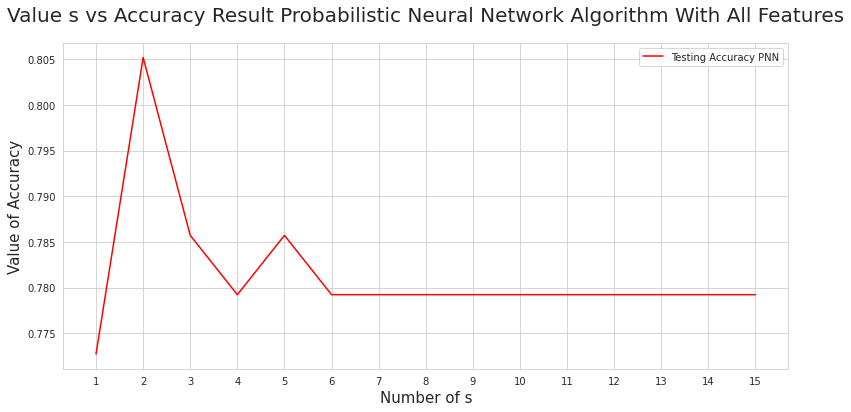

In [41]:
# Accuracy for Probabilistic Neural Network 

variable_std = range(1,16)

test_pnn_accuracy = []
result_kfold_pnn = []
for i ,s in enumerate(variable_std, start=1):
  model_pnn = algorithms.PNN(std=s, verbose=False).fit(X_train, y_train)
  y_predict = model_pnn.predict(X_test)

  test_pnn_accuracy.append(accuracy_score(y_predict,y_test))
  print('Value of Std = ',i, 'The Accuracy of the Probabilistic Neural Network Classifier is',round(test_pnn_accuracy[i-1]*100,1))

plt.figure(figsize=(13,6))
plt.plot(variable_std, test_pnn_accuracy, label = "Testing Accuracy PNN", color='red')
plt.legend()
print()
plt.title('Value s vs Accuracy Result Probabilistic Neural Network Algorithm With All Features', pad=5, y=1.05, size=20 )
plt.xlabel('Number of s', fontsize=15)
plt.ylabel('Value of Accuracy', fontsize=15)
plt.savefig('Graph_Accuracy_PNN_All.png')
plt.xticks(variable_std)
plt.show()

In [42]:
# Accuracy from K-Fold Cross Validation
classifier_pnn = algorithms.PNN(std=2, verbose=False).fit(X_train, y_train)
kfold_pnn = KFold(n_splits=4, random_state=0, shuffle=True) # k=10, split the data into 10 equal parts
result_pnn=cross_val_score(classifier_pnn, Feature_variables, Target_variable, cv=kfold_pnn,scoring='accuracy', n_jobs=1)
print(result_pnn*100)
print('Hasil rata - rata Akurasi PNN -> K-Fold dengan All Features : ', round(result_pnn.mean()*100,1))

Time: 0:00:00 |N/A%|                                           | ETA:  --:--:--

[75.52083333 73.95833333 77.08333333 70.83333333]
Hasil rata - rata Akurasi PNN -> K-Fold dengan All Features :  74.3


Confusion Matrix 
 [[80 19]
 [11 44]]



Text(0.5, 1.0, 'Confusion Matrix PNN All Features')

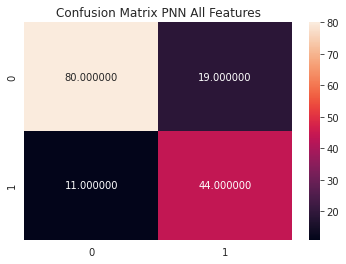

In [43]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
classifier_pnn = algorithms.PNN(std=2, verbose=False, batch_size=128).fit(X_train, y_train)
predict_pnn = classifier_pnn.predict(X_test)

cm = confusion_matrix(y_test, predict_pnn)
print('Confusion Matrix \n', cm)

print()
sns.heatmap(cm, annot=True, fmt="f").set_title('Confusion Matrix PNN All Features')

# k-Nearest Neighbor



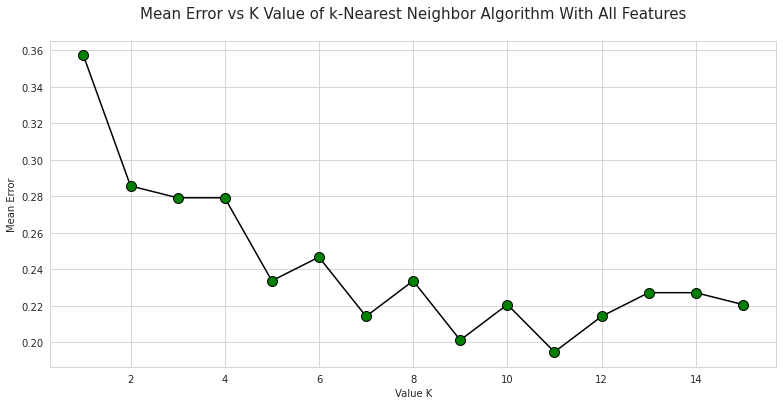

In [44]:
# Modelling of algorithms k-Nearest Neighbor 
# import library 
from sklearn.neighbors import KNeighborsClassifier 

# train model and predict 
error_rate = []

# n = input value
for n in range (1,16):
  modelknn = KNeighborsClassifier(n_neighbors=n, metric='euclidean').fit(X_train, y_train) 
  predictKNN = modelknn.predict(X_test)

  error_rate.append(np.mean(predictKNN   != y_test))

plt.figure(figsize=(13,6))
plt.plot(range(1,16), error_rate, color='black', marker ='o', markerfacecolor='green', markersize=10)
plt.title('Mean Error vs K Value of k-Nearest Neighbor Algorithm With All Features', y=1.05, size=15)
plt.xlabel('Value K')
plt.ylabel('Mean Error')
plt.savefig('Mean_Error_KNN_All.png')
plt.show()

Value of neighbors =  1 The accuracy of the k-Nearst Neighbors Classifier is 64.3
Value of neighbors =  2 The accuracy of the k-Nearst Neighbors Classifier is 71.4
Value of neighbors =  3 The accuracy of the k-Nearst Neighbors Classifier is 72.1
Value of neighbors =  4 The accuracy of the k-Nearst Neighbors Classifier is 72.1
Value of neighbors =  5 The accuracy of the k-Nearst Neighbors Classifier is 76.6
Value of neighbors =  6 The accuracy of the k-Nearst Neighbors Classifier is 75.3
Value of neighbors =  7 The accuracy of the k-Nearst Neighbors Classifier is 78.6
Value of neighbors =  8 The accuracy of the k-Nearst Neighbors Classifier is 76.6
Value of neighbors =  9 The accuracy of the k-Nearst Neighbors Classifier is 79.9
Value of neighbors =  10 The accuracy of the k-Nearst Neighbors Classifier is 77.9
Value of neighbors =  11 The accuracy of the k-Nearst Neighbors Classifier is 80.5
Value of neighbors =  12 The accuracy of the k-Nearst Neighbors Classifier is 78.6
Value of neig

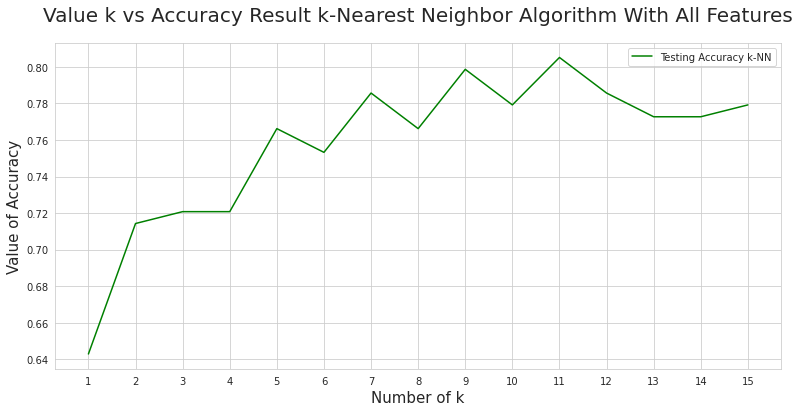

In [45]:
# Evaluation K-Nearest Neighbor with KFold Cross Validation 

n_neighbor = range(1,16)

test_knn_accuracy = []
result_kfold_knn = []

for i ,n in enumerate(n_neighbor, start=1):
  modelknn = KNeighborsClassifier(n_neighbors = n, metric='euclidean')
  modelknn.fit(X_train,y_train) # Fit the model instances with .fit() using the training set.
  predictKNN=modelknn.predict(X_test) 

  test_knn_accuracy.append(accuracy_score(predictKNN,y_test))
  print('Value of neighbors = ',i, 'The accuracy of the k-Nearst Neighbors Classifier is',round(test_knn_accuracy[i-1]*100,1))

# Graphic Accuracy 
plt.figure(figsize=(13,6))
plt.plot(n_neighbor, test_knn_accuracy, label = "Testing Accuracy k-NN", color='green')
plt.legend()
print()
plt.title('Value k vs Accuracy Result k-Nearest Neighbor Algorithm With All Features',pad=5, y=1.05, size=20 )
plt.xlabel('Number of k', fontsize=15)
plt.ylabel('Value of Accuracy', fontsize=15)
plt.xticks(n_neighbor)
plt.savefig('Graph_Accuracy_KNN_All.png')
plt.show()

In [46]:
# Accuracy from K-Fold Cross Validation
classifier_knn= KNeighborsClassifier(n_neighbors = 11, metric='euclidean').fit(X_train, y_train)
kfold_knn = KFold(n_splits=4, random_state=0, shuffle=True) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(classifier_knn, Feature_variables, Target_variable, cv=kfold_knn,scoring='accuracy', n_jobs=1)
print(result_knn*100)
print('Hasil rata - rata Akurasi KNN -> K-Fold dengan All Features : ', round(result_knn.mean()*100,1))

[78.125      70.3125     77.60416667 72.39583333]
Hasil rata - rata Akurasi KNN -> K-Fold dengan All Features :  74.6


Confusion Matrix 
 [[90  9]
 [21 34]]



Text(0.5, 1.0, 'Confusion Matrix k-NN All Features')

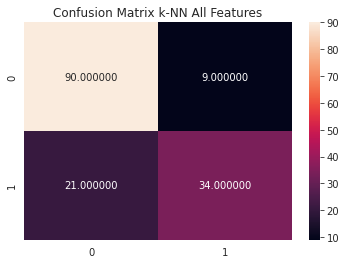

In [47]:
# Confusion Matrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
classifier_knn = KNeighborsClassifier(n_neighbors = 11, metric='euclidean').fit(X_train, y_train)
predict_knn=classifier_knn.predict(X_test) 

cm = confusion_matrix(y_test, predict_knn)
print('Confusion Matrix \n', cm)

print()
sns.heatmap(cm, annot=True, fmt="f").set_title('Confusion Matrix k-NN All Features')

**Graphic from PNN and k-NN with all features**

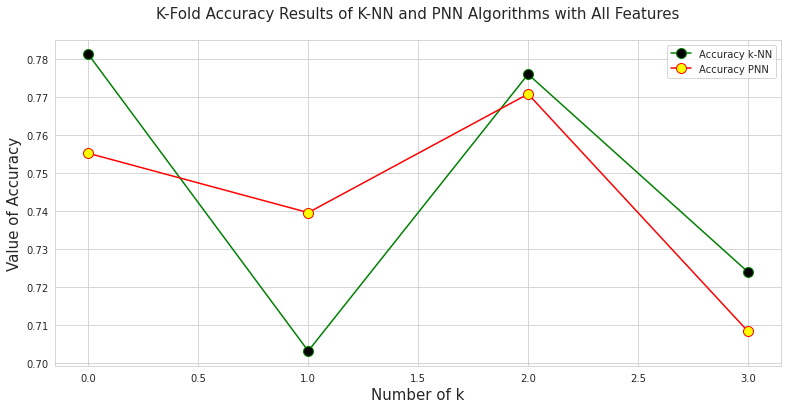

In [48]:
# Graphic Accuracy from KFold
plt.figure(figsize=(13,6))
plt.plot(result_knn, label = "Accuracy k-NN", color='green',marker ='o', markerfacecolor='black', markersize=10)
plt.plot(result_pnn, label = "Accuracy PNN", color='red',marker ='o', markerfacecolor='yellow', markersize=10)
plt.legend()
print()
plt.title('K-Fold Accuracy Results of K-NN and PNN Algorithms with All Features',pad=5, y=1.05, size=15 )
plt.xlabel('Number of k', fontsize=15)
plt.ylabel('Value of Accuracy', fontsize=15)
plt.savefig('Graph_Accuracy_KFOLD_AllFeatures.png')
plt.show()

Save Model 

In [49]:
#joblib.dump(modelknn, 'model-klasifikasi-diabetes.pkl')

In [50]:
#lmodel = joblib.load('model-klasifikasi-diabetes.pkl)